# Practice Loading and Exploring Datasets

This assignment is purposely open-ended. You will be asked to load datasets from the [UC-Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Even though you maybe using different datasets than your fellow classmates, try and be supportive and assist each other in the challenges that you are facing. You will only deepend your understanding of these topics as you work to assist one another. Many popular UCI datasets face similar data loading challenges.

Remember that the UCI datasets do not necessarily have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally or using the `!curl` shell command -or in some other way before you try and read it in as a dataframe. This will help you catch what would otherwise be unforseen problems.

Feel free to embellish this notebook with additional markdown cells,code cells, comments, graphs, etc. Whatever you think helps adequately address the questions.

## 1) Load a dataset from UCI (via its URL)

Please navigate to the home page and choose a dataset (other than the Adult dataset) from the "Most Popular" section on the right-hand side of the home page. Load the dataset via its URL and check the following (show your work):

- Are the headers showing up properly?
- Look at the first 5 and the last 5 rows, do they seem to be in order?
- Does the dataset have the correct number of rows and columns as described in the UCI page? 
 - Remember, that UCI does not count the y variable (column of values that we might want to predict via a machine learning model) as an "attribute" but rather as a "class attribute" so you may end up seeing a number of columns that is one greater than the number listed on the UCI website.
- Does UCI list this dataset as having missing values? Check for missing values and see if your analysis corroborates what UCI reports?
- if `NaN` values or other missing value indicators are not being detected by `df.isnull().sum()` find a way to replace whatever is indicating the missing values with `np.NaN`.
- Use the .describe() function in order to see the summary statistics of both the numeric and non-numeric columns. 

In [0]:
import pandas as pd
# Poker Hands!
# Split into training and test
# Training only has ~25k records
# So I'll just be using that
poker_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data'
poker_hdrs = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'CLASS']
poker = pd.read_csv(poker_url, names=poker_hdrs)

In [2]:
poker.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [3]:
# I have no idea if there's some kind of order here;
# if there is, I can't see it.
poker.tail()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
25005,3,9,2,6,4,11,4,12,2,4,0
25006,4,1,4,10,3,13,3,4,1,10,1
25007,2,1,2,10,4,4,4,1,4,13,1
25008,2,12,4,3,1,10,1,12,4,9,1
25009,1,7,3,11,3,3,4,8,3,7,1


In [4]:
# Correct number of columns.
# As mentioned above, actual dataset
# was split into train/test; the number
# of rows listed by UCI matches
# train rows + test rows
poker.shape

(25010, 11)

In [6]:
# UCI says no missing values
#
# According to the .names file included with the dataset,
# suit is always 1-4, rank is always 1-13, and
# the type of hand it makes is always 0-9
#
# Fortunately, the data's not very complex; so we
# can just look for anything beyond those values:
poker.dtypes

S1       int64
C1       int64
S2       int64
C2       int64
S3       int64
C3       int64
S4       int64
C4       int64
S5       int64
C5       int64
CLASS    int64
dtype: object

In [27]:
suits_allowed = range(1,5)
ranks_allowed = range(1,14)
class_allowed = range(10)

def getFounds(df, col):
  return list(df[col].value_counts().keys())
def getUnexpecteds(found, expected):
  return list(set(found) - set(expected))
def toStr(x, lis):
  return x.join(map(str, lis))
def printResults(name, vals):
  msg = "None!" if len(vals) == 0 else toStr('|', vals)
  print('Illegal ' + name + ': ' + msg)

def suitRank(prefix, allowed, name):
  for n in range(5):
    values_found = getFounds(poker, prefix + str(n + 1))
    illegal_values = getUnexpecteds(values_found, allowed)
    printResults(name + ' (card ' + str(n + 1) + ')', illegal_values)
def justClass(allowed):
  values_found = getFounds(poker, 'CLASS')
  illegal_values = getUnexpecteds(values_found, allowed)
  printResults('hands', illegal_values)

suitRank('S', suits_allowed, 'suits')
suitRank('C', ranks_allowed, 'ranks')
justClass(class_allowed)

# no problem ಠ_ಠ

Illegal suits (card 1): None!
Illegal suits (card 2): None!
Illegal suits (card 3): None!
Illegal suits (card 4): None!
Illegal suits (card 5): None!
Illegal ranks (card 1): None!
Illegal ranks (card 2): None!
Illegal ranks (card 3): None!
Illegal ranks (card 4): None!
Illegal ranks (card 5): None!
Illegal hands: None!


In [29]:
# err no non-numeric columns
poker.describe()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
count,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000
mean,2.508756,6.995242,2.497721,7.014194,2.510236,7.014154,2.495922,6.942463,2.497321,6.962735,0.621152
std,1.116483,3.749805,1.121767,3.766974,1.123148,3.744974,1.116009,3.747147,1.118732,3.741579,0.788361
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,1.000000
75%,4.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,3.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


## 2) Load a dataset from your local machine.
Choose a second dataset from the "Popular Datasets" listing on UCI, but this time download it to your local machine instead of reading it in via the URL. Upload the file to Google Colab using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

- Answer all of the same bullet point questions from part 1 again on this new dataset. 


In [32]:
from google.colab import files
upload = files.upload()

Saving wine.data to wine.data


In [0]:
wine_hdrs = ['CLASS', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
             'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
             'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
             'Proline']
wine = pd.read_csv('wine.data', names=wine_hdrs)

In [34]:
wine.head()

,CLASS,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [35]:
# YUP IT'S ORDERED
wine.tail()

,CLASS,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [37]:
# Correct number of rows
# UCI lists 13 attributes;
# classifier ("y") makes 14
wine.shape

(178, 14)

In [38]:
# UCI says no missing values
wine.dtypes

CLASS                             int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [39]:
# Everything's a number
# And nothing starts at 0 (fwiw)
# So it looks like no missing values
wine.describe()

,CLASS,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## 3) Make Crosstabs of the Categorical Variables

Take whichever of the above datasets has more categorical variables and use crosstabs to tabulate the different instances of the categorical variables.


In [43]:
pd.crosstab(poker['S1'], poker['CLASS'])

CLASS,0,1,2,3,4,5,6,7,8,9
S1,,,,,,,,,,
1,3090,2626,262,120,28,12,9,0,2,1
2,3153,2662,323,123,17,11,6,1,1,1
3,3073,2676,308,134,31,12,11,3,1,1
4,3177,2635,313,136,17,19,10,2,1,2


In [44]:
pd.crosstab(poker['C1'], poker['CLASS'])

CLASS,0,1,2,3,4,5,6,7,8,9
C1,,,,,,,,,,
1,991,841,83,52,5,5,2,0,2,1
2,962,825,93,46,4,7,2,1,1,0
3,946,807,83,37,7,0,1,1,0,0
4,980,801,81,42,7,3,5,0,0,0
5,924,807,103,44,7,3,3,0,1,0
6,947,781,83,30,9,6,4,0,0,0
7,973,845,90,45,4,2,2,0,0,0
8,976,812,101,37,12,2,5,3,0,0
9,1010,815,93,31,6,8,3,0,1,0


## 4) Explore the distributions of the variables of the dataset using:
- Histograms
- Scatterplots
- Density Plots

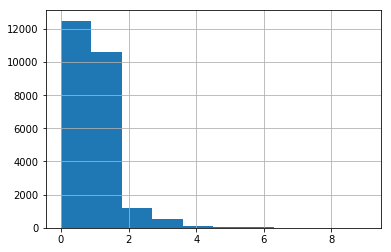

In [50]:
poker['CLASS'].hist();

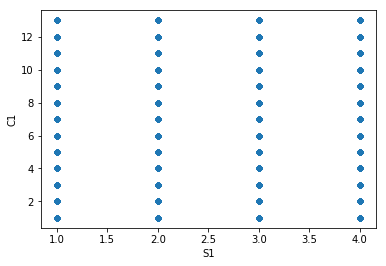

In [54]:
poker.plot.scatter('S1', 'C1');
# in retrospect, I stand by it

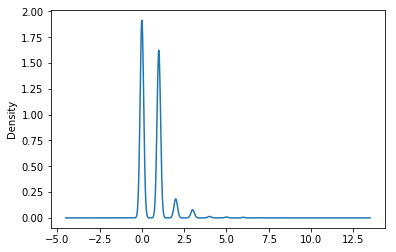

In [56]:
poker['CLASS'].plot.kde();

## 5) Create at least one visualization from a crosstab:

Remember that a crosstab is just a dataframe and can be manipulated in the same way by row index, column, index, or column/row/cell position.


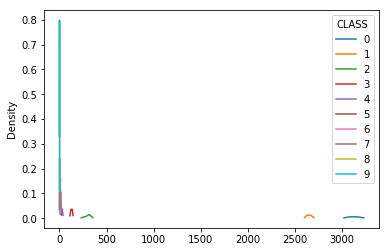

In [61]:
pd.crosstab(poker['S1'], poker['CLASS']).plot.kde();

## Stretch Goals 

The following additional study tasks are optional, they are intended to give you an opportunity to stretch yourself beyond the main requirements of the assignment. You can pick and choose from the below, you do not need to complete them in any particular order.

### - Practice Exploring other Datasets

### -  Try using the Seaborn plotting library's "Pairplot" functionality in order to explore all of the possible histograms and scatterplots of your dataset all at once:

[Seaborn Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

### - Turn some of the continuous variables into categorical variables by binning the values using:
- [pd.cut()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)
- [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)
- <https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut>

And then use crosstabs to compare/visualize these binned variables against the other variables.


### - Other types and sources of data
Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.

In [0]:
# EXPLORING ABALONEY
abal_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
abal_hdrs = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
             'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
abal = pd.read_csv(abal_url, names=abal_hdrs)

In [64]:
abal.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [65]:
abal.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [66]:
abal.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [67]:
# I stands for infant, and is therefore not null
abal['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

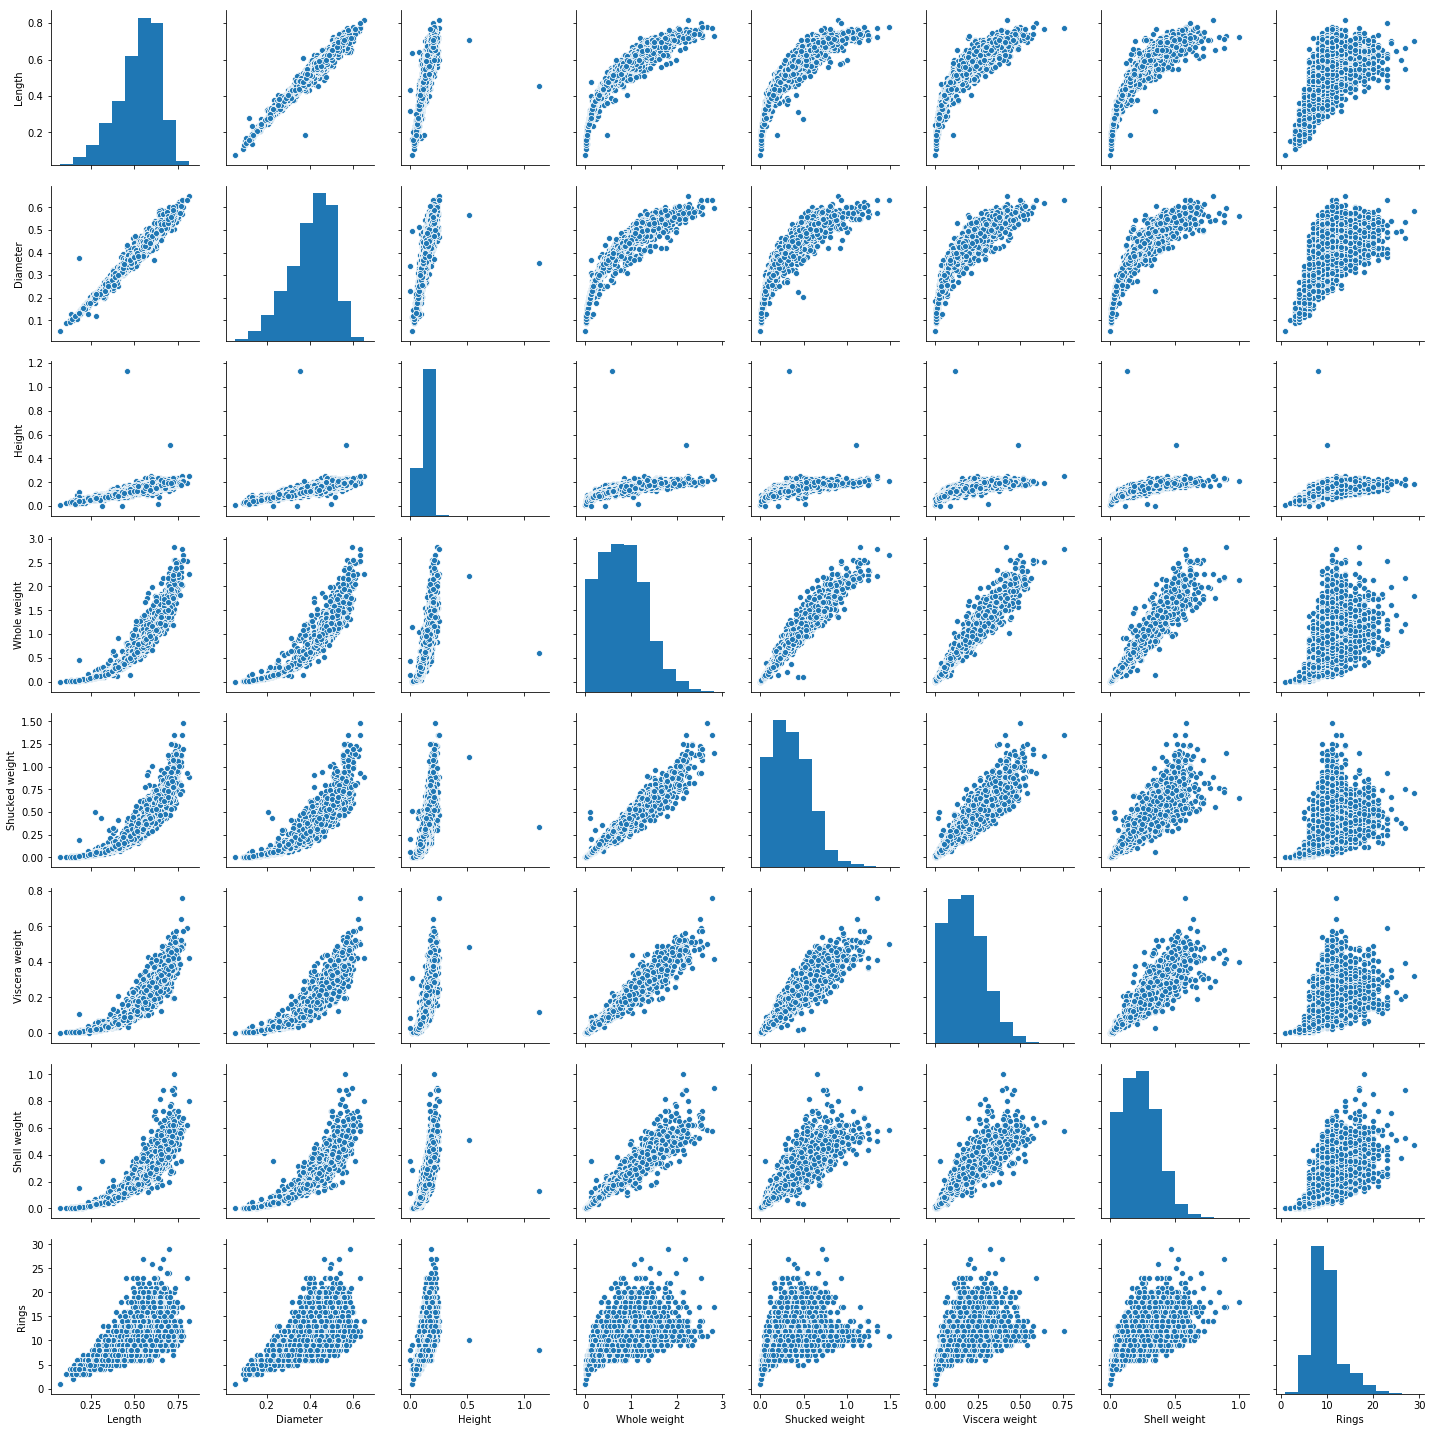

In [68]:
import seaborn as sns
sns.pairplot(abal);

In [69]:
abal.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [88]:
binning = [x / 10 for x in range(13)]

abal['Length-Bin'] = abal['Length'].map(lambda x: x * 10)
#abal['Diameter-Bin'] = pd.cut(abal['Diameter'], binning)
#abal['Height-Bin'] = pd.cut(abal['Height'], binning)
abal.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Length-Bin
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0.6
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0.7
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0.6
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0.5


In [77]:
abal.dtypes

Sex                 object
Length             float64
Diameter           float64
Height             float64
Whole weight       float64
Shucked weight     float64
Viscera weight     float64
Shell weight       float64
Rings                int64
Length-Bin        category
Diameter-Bin      category
Height-Bin        category
dtype: object